In [3]:
import pandas as pd
from matplotlib import pyplot as plt
#!/usr/bin/env python
# a bar plot with errorbars
import numpy as np

%matplotlib inline
#df0 = pd.read_excel(r"C:\Users\ReddyAl\Documents\Surveys\Towers Watson Global Compensation May 2016\Oracle Employee Report 23-May-2016.xlsx")
#df0.to_csv('temp.csv', encoding='utf-8')
import os
import sys
import glob
#filename = glob.glob( "".join([ os.getcwd(), "\\temp.csv"]))
filename = r"C:\Users\ReddyAl\Desktop\gunnu Book1.xlsx"
df = pd.read_excel(filename)



In [2]:
plt.plot(df.Regular)

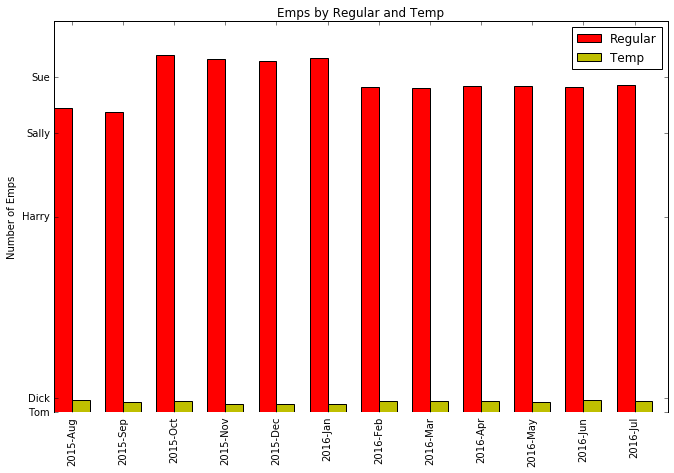

In [61]:
#%matplotlib inline
N = len(df.Regular)
menMeans = df.Regular
menStd = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(sharex=True)
rects1 = ax.bar(ind, menMeans, width, color='r')#, yerr=menStd)

womenMeans = df.Temporary#(25, 32, 34, 20, 25)
womenStd = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, womenMeans, width, color='y')# yerr=womenStd)

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Emps')
ax.set_title('Emps by Regular and Temp')
ax.set_xticks(ind + width)
ax.set_xticklabels(df.xlabels.tolist())

ax.legend((rects1[0], rects2[0]), ('Regular', 'Temp'))

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

plt.xticks(rotation='vertical')
plt.yticks((0, 500, 7000, 10000, 12000, 14000), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
fig.set_size_inches(w=11,h=7)
#autolabel(rects1)
#autolabel(rects2)
#fig.savefig('gunnu reg vs temp.png')   # save the figure to file
#plt.close(fig)  
#plt.show()


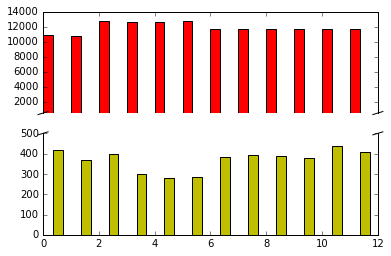

In [74]:
"""
Broken axis example, where the y-axis will have a portion cut out.
"""
import matplotlib.pyplot as plt
import numpy as np



# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.bar(ind, menMeans, width, color='r')
ax2.bar(ind + width, womenMeans, width, color='y')# yerr=womenStd)
# zoom-in / limit the view to different portions of the data
ax.set_ylim(500, 14000)  # outliers only
ax2.set_ylim(0, 500)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

In [109]:
df['Month and Year'] = df.Date.map(lambda x: x.strftime('%b, %Y'))

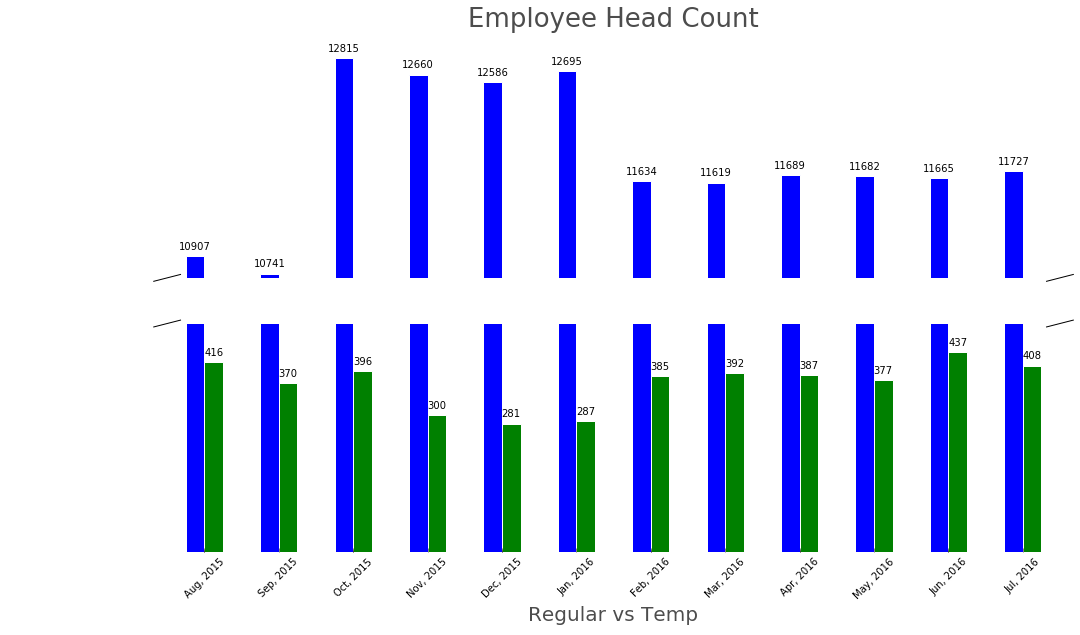

In [205]:
_df = df[['Month and Year', 'Regular', 'Temporary']]
_df.set_index('Month and Year', inplace=True, drop=True)

# Set color transparency (0: transparent; 1: solid)
a = 0.7

ttl = 'Employee Head Count'

f, axis = plt.subplots(2, 1, sharex=True)

_df.plot(kind='bar', ax=axis[0], title=ttl, edgecolor='w')
_df.plot(kind='bar', ax=axis[1], edgecolor='w')


axis[0].set_ylim(_df.Regular.min()-1000, _df.Regular.max())
axis[1].set_ylim(0, _df.Temporary.max()+10)
axis[0].legend().set_visible(False)
axis[1].legend().set_visible(False)

axis[0].spines['bottom'].set_visible(False)
axis[1].spines['top'].set_visible(False)
axis[0].xaxis.tick_top()
axis[0].tick_params(labeltop='off')
axis[1].xaxis.tick_bottom()
d = .015
kwargs = dict(transform=axis[0].transAxes, color='k', clip_on=False)
axis[0].plot((-d,+d),(-d,+d), **kwargs)
axis[0].plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=axis[1].transAxes)
axis[1].plot((-d,+d),(1-d,1+d), **kwargs)
axis[1].plot((1-d,1+d),(1-d,1+d), **kwargs)
f.set_size_inches(w=16,h=9)

##Title
axis[0].set_title(axis[0].get_title(), fontsize=26, alpha=a, ha='center')
plt.subplots_adjust(top=0.9)
axis[0].title.set_position((0.5,1.08))


for p in axis[0].patches:
    axis[0].annotate("%.f" % p.get_height()
            , (p.get_x() + p.get_width() / 2., p.get_height())
            , ha='center', va='center', xytext=(0, 10), textcoords='offset points')


for p in axis[1].patches:
    axis[1].annotate("%.f" % p.get_height()
            , (p.get_x() + p.get_width() / 2., p.get_height())
            , ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for _ in [0,1]:
    # Remove grid lines (dotted lines inside plot)
    axis[_].grid(False)
    # Remove plot frame
    axis[_].set_frame_on(False)
    # Pandas trick: remove weird dotted line on axis
    axis[_].lines[0].set_visible(True)
    #axis[_].xaxis.tick_top()
    xlab = 'Regular vs Temp'
    axis[_].set_xlabel(xlab, fontsize=20, alpha=a, ha='center')


#Customize y tick labels
yticks = [item.get_text() for item in axis[0].get_yticklabels()]
axis[0].set_yticklabels(yticks, fontsize=16, alpha=a)
axis[0].yaxis.set_tick_params(pad=12)  
yticks = [item.get_text() for item in axis[1].get_yticklabels()]
axis[1].set_yticklabels(yticks, fontsize=16, alpha=a)
axis[1].yaxis.set_tick_params(pad=12)

axis[0].get_xaxis().set_visible(False)
axis[1].get_yaxis().set_visible(False)
axis[0].get_yaxis().set_visible(False)
#axis[1].get_xaxis().set_visible(False)

def round_up(x):
    return x if x % 100 == 0 else x + 100 - x % 100

def round_down(num, divisor):
    return num - (num%divisor)

axis[1].set_ylim(0,round_up(_df.Temporary.max()))
axis[0].set_ylim(round_down(_df.Regular.min(),100),roundup(_df.Regular.max()))
plt.xticks(rotation=45)

plt.savefig('Emp HC Gunnu.png', dpi =300)
plt.show()